In [2]:
import numpy as np 

In [20]:
    EPOCHS = 75; batch_s  = 64; run = 1; step = 0; train_steps = 35000; heads = 32; ℯ = 512; context = 50
    l = [256, 256, 64, 32]

In [21]:
xx = np.concatenate((np.random.choice(np.arange(1, 360), 10).reshape(1, -1), np.random.choice(np.arange(400, 660), 10).reshape(1, -1)))

In [22]:
yy = np.random.uniform(1, 10, 10).reshape(1, -1)

In [23]:
train_step, test_step, loss_object, train_loss, test_loss, m_tr, m_te = grapher.build_graph()

In [24]:
 optimizer_c = tf.keras.optimizers.Adam(3e-4)

In [25]:
decoder5 = experimental_model.Decoder(ℯ, l[1], l[2], l[3], num_heads = heads)

In [26]:
train_step(decoder5, optimizer_c, train_loss, m_tr, pos = xx, tar = yy, context_p = context)

ValueError: in user code:

    /Users/omernivron/PycharmProjects/attention/model/grapher.py:44 train_step  *
        pred = decoder(pos, tar_inp, True, combined_mask_pos[:, 1:, :-1])
    /Users/omernivron/PycharmProjects/attention/model/experimental_model.py:26 call  *
        attn, _ = self.mha(y, x, x, x_mask)
    /Users/omernivron/PycharmProjects/attention/model/dot_prod_attention.py:87 call  *
        v = self.split_heads(v, batch_size)
    /Users/omernivron/PycharmProjects/attention/model/dot_prod_attention.py:71 split_heads  *
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
    /Users/omernivron/.conda/envs/pythonProject/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:201 wrapper  **
        return target(*args, **kwargs)
    /Users/omernivron/.conda/envs/pythonProject/lib/python3.7/site-packages/tensorflow/python/ops/array_ops.py:195 reshape
        result = gen_array_ops.reshape(tensor, shape, name)
    /Users/omernivron/.conda/envs/pythonProject/lib/python3.7/site-packages/tensorflow/python/ops/gen_array_ops.py:8378 reshape
        "Reshape", tensor=tensor, shape=shape, name=name)
    /Users/omernivron/.conda/envs/pythonProject/lib/python3.7/site-packages/tensorflow/python/framework/op_def_library.py:750 _apply_op_helper
        attrs=attr_protos, op_def=op_def)
    /Users/omernivron/.conda/envs/pythonProject/lib/python3.7/site-packages/tensorflow/python/framework/func_graph.py:592 _create_op_internal
        compute_device)
    /Users/omernivron/.conda/envs/pythonProject/lib/python3.7/site-packages/tensorflow/python/framework/ops.py:3536 _create_op_internal
        op_def=op_def)
    /Users/omernivron/.conda/envs/pythonProject/lib/python3.7/site-packages/tensorflow/python/framework/ops.py:2016 __init__
        control_input_ops, op_def)
    /Users/omernivron/.conda/envs/pythonProject/lib/python3.7/site-packages/tensorflow/python/framework/ops.py:1856 _create_c_op
        raise ValueError(str(e))

    ValueError: Dimension size must be evenly divisible by 1024 but is 4608 for '{{node decoder_1/multi_head_attention_1/Reshape_2}} = Reshape[T=DT_DOUBLE, Tshape=DT_INT32](decoder_1/multi_head_attention_1/wv/BiasAdd, decoder_1/multi_head_attention_1/Reshape_2/shape)' with input shapes: [1,9,512], [4] and with input tensors computed as partial shapes: input[1] = [2,?,32,16].


In [7]:
import sys
sys.path.append("..")
from model import experimental_model, experimental2d_model, grapher
from data import loader
from helpers import helpers, plotter
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf

In [8]:
# options: rbf, periodic
print('Kernel? rbf/rbf_noise/periodic/rbf_const_2D/rbf_rbf_2D')
kernel = input()
d = True if kernel.split('_')[-1] == '2D' else False
save_dir = '/Users/omernivron/Downloads/GPT_' + kernel

Kernel? rbf/rbf_noise/periodic/rbf_const_2D/rbf_rbf_2D
rbf_const_2D


In [9]:
data = loader.load_data(kernel, size = 1, rewrite = 'False', d = d)

['em_te_2.npy', 'pad_pos_tr.npy', 'pad_pos_te.npy', 'em_te.npy', 'em_tr.npy', 'pad_y_fren_tr.npy', 'pad_y_fren_te.npy', 'em_tr_2.npy']


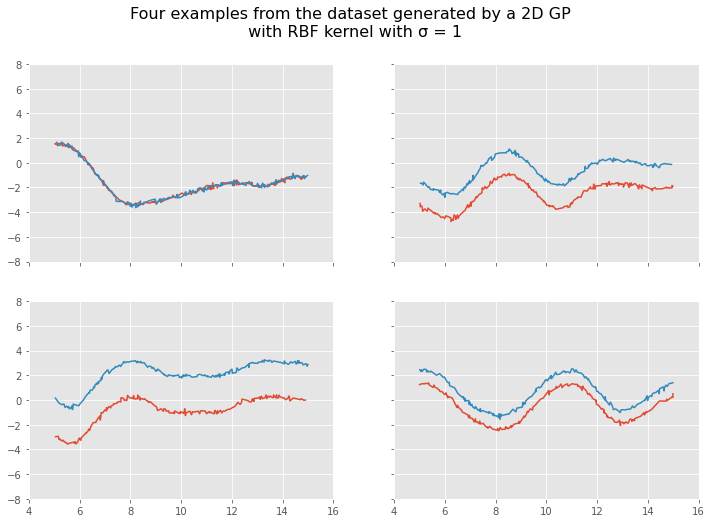

In [10]:
if d:
    plotter.plot_2d_examples(data[1], data[-3], data[-1])
else:
    plotter.plot_examples(data[0], data[4])

In [11]:
run = 1
name_comp = 'run_' + str(run) 
folder = save_dir + '/ckpt/check_' + name_comp; 

In [12]:
train_step, test_step, loss_object, train_loss, test_loss, m_tr, m_te = grapher.build_graph()

In [13]:
ℯ = 512; l = [256, 256, 64, 32];  heads = 32; context = 50; order = True; consec = True
ℯ, l1, _, l2, l3 = helpers.load_spec(folder, ℯ, l, context_p = 10, d = d); 

In [14]:
if d:
    decoder = experimental2d_model.Decoder(ℯ, l1, l2, l3, num_heads = heads)
else:
    decoder = experimental_model.Decoder(ℯ, l1, l2, l3, num_heads = heads, input_vocab_size = 200)

In [15]:
optimizer_c = tf.keras.optimizers.Adam(3e-4)
ckpt = tf.train.Checkpoint(step=tf.Variable(1), optimizer = optimizer_c, net = decoder)
manager = tf.train.CheckpointManager(ckpt, folder, max_to_keep=3)
ckpt.restore(manager.latest_checkpoint)

sample # 0, r squared: -1.4308698639671862
sample # 1, r squared: -1.4939277978734027
sample # 2, r squared: -0.18706132080301785
sample # 3, r squared: 0.19013733949846034
sample # 4, r squared: -0.022070765040325124
sample # 5, r squared: -0.28932351161888015
sample # 6, r squared: -0.17008149179742094
sample # 7, r squared: 0.27364455133766585
sample # 8, r squared: -0.45891895569676366
sample # 9, r squared: -0.5488185000748158


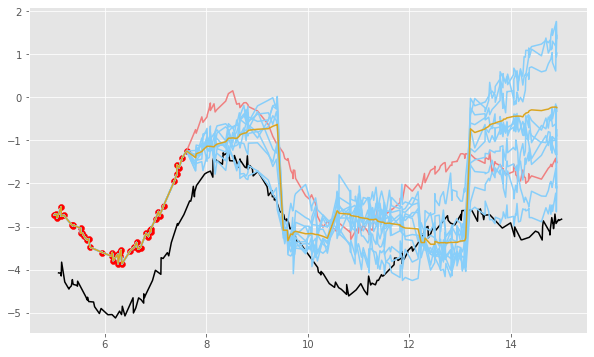

In [16]:
if d:
    idx = int(43)
    plotter.infer_plot2D(decoder, data[2][idx, :], data[6][idx, :], data[3][idx, :], data[0][idx, :], samples = 10, num_steps = 999, consec = consec, order = order)

else:  
    idx = int(1601)
    plotter.infer_plot(decoder, em = data[2][idx, :], x = data[1][idx, :], y = data[-1][idx, :], num_steps = 150, samples = 100, context_p = context, order = order, consec = consec)

In [ ]:
plotter.all_inference(consec = True)

['pad_pos_tr.npy', 'pad_pos_te.npy', 'em_te.npy', 'em_tr.npy', 'pad_y_fren_tr.npy', 'pad_y_fren_te.npy']
RBF(length_scale=1)
RBF(length_scale=1) + WhiteKernel(noise_level=0.5)
RBF(length_scale=0.987) + WhiteKernel(noise_level=0.0516)
RBF(length_scale=1)
RBF(length_scale=1) + WhiteKernel(noise_level=0.5)
RBF(length_scale=0.91) + WhiteKernel(noise_level=0.0523)
['pad_pos_tr.npy', 'pad_pos_te.npy', 'em_te.npy', 'em_tr.npy', 'pad_y_fren_tr.npy', 'pad_y_fren_te.npy']
ExpSineSquared(length_scale=1, periodicity=1)
ExpSineSquared(length_scale=1.09, periodicity=3.02)
ExpSineSquared(length_scale=1, periodicity=1)
ExpSineSquared(length_scale=1, periodicity=9.02)
['.DS_Store', 'pad_pos_tr.npy', 'pad_pos_te.npy', 'em_te.npy', 'em_tr.npy', 'pad_y_fren_tr.npy', 'pad_y_fren_te.npy']
RBF(length_scale=1)
RBF(length_scale=0.974)
RBF(length_scale=1)
RBF(length_scale=0.991)


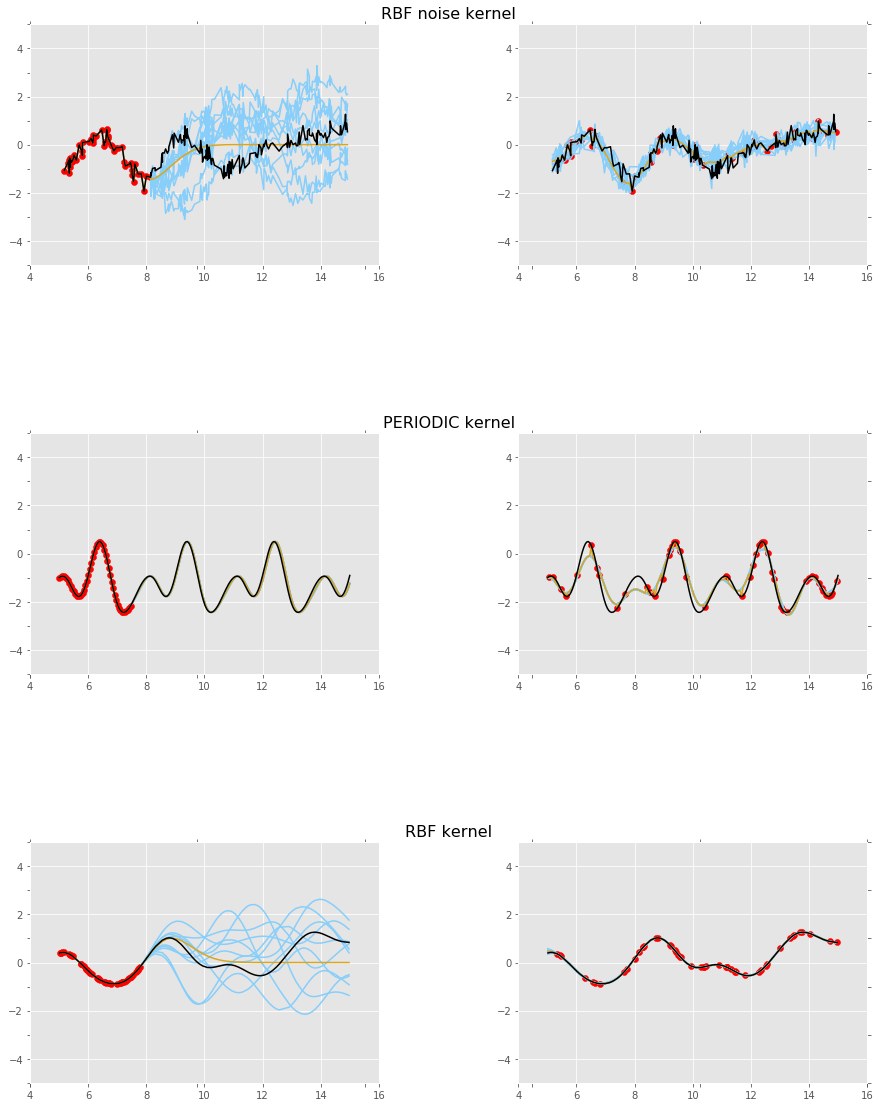

In [3]:
plotter.GP_infer1D()